#Stat220_Lab1_Group9 - Young Woo Song, Joseph Mattson, Jacob Anderson, Luke Dachenhausen

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Download

In [ ]:
url = "https://richardson.byu.edu/220/ds_salary.csv"
df = pd.read_csv(url)

df

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
576,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
577,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
578,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
579,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Question 1 - General Salary Data

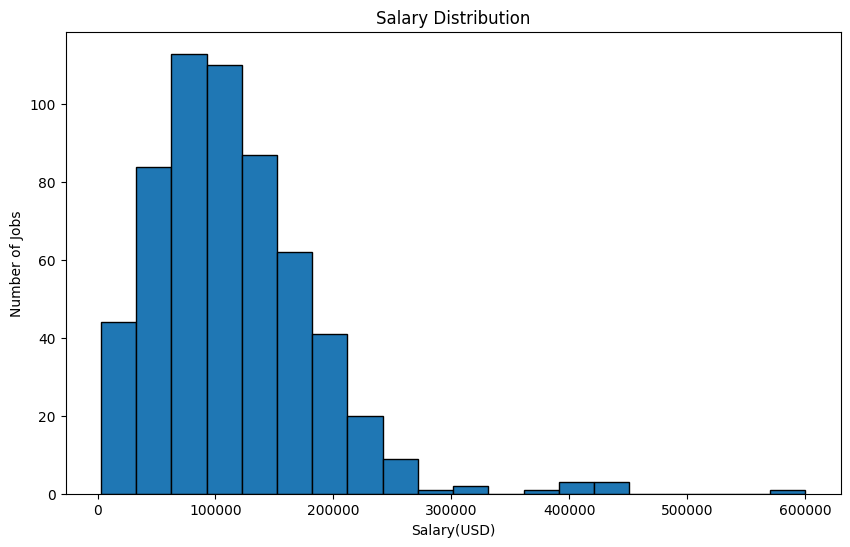

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=20, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary(USD)')
plt.ylabel('Number of Jobs')
plt.show()

To start the analysis, first thing to do is examining the general shape of the salary data. Histogram is a great choice to show the distribution of salaries across the dataset.


**Observations**

1. Salary distribution is right-skewed - concentrated in the lower, mid-range.
2. Majority salary distribution is between \$50,000 and \$150,000.
3. There are some outliers which are above \$350,000.

# Question 2: Relationship between Experience Level and Salary

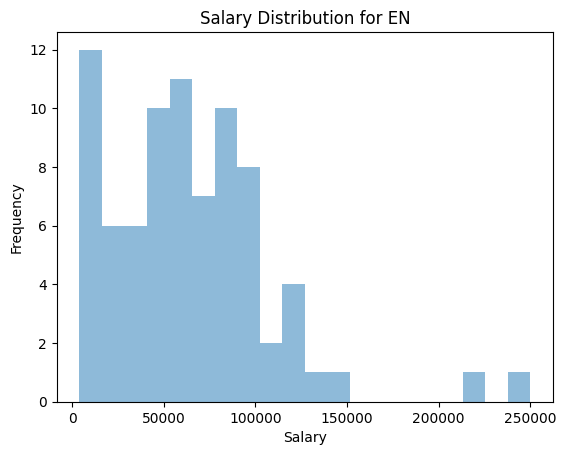

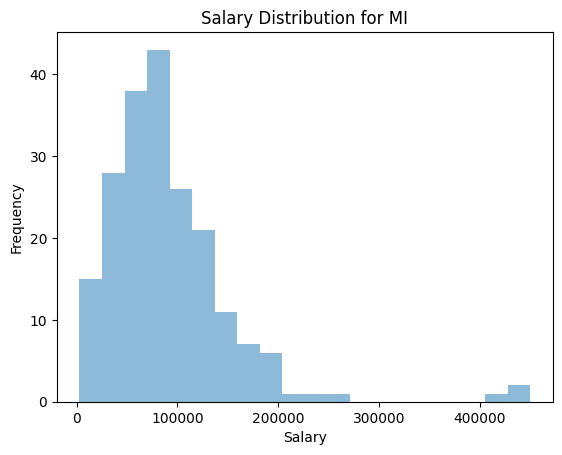

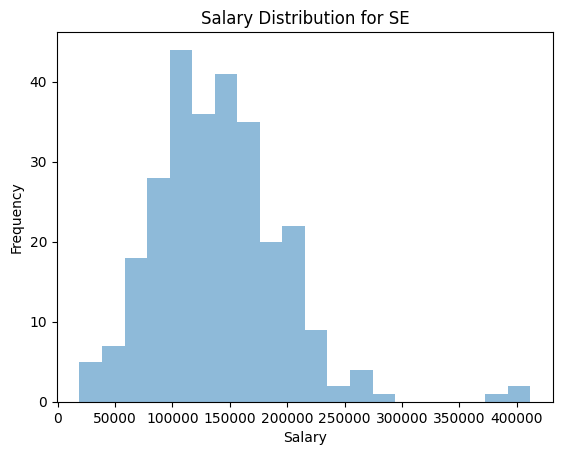

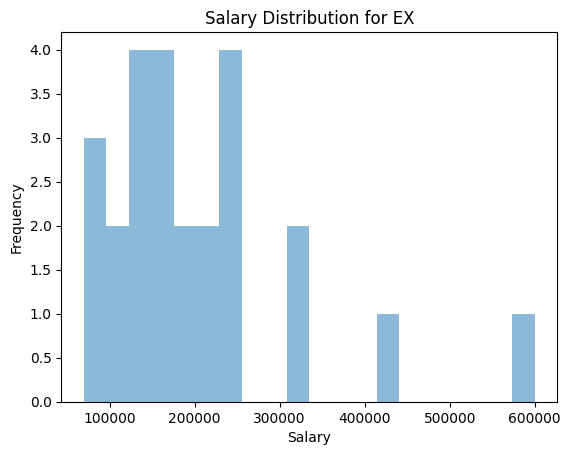

In [ ]:
for experience_level in ['EN', 'MI', 'SE', 'EX']:
    plt.hist(df[df['experience_level'] == experience_level]['salary_in_usd'], bins=20, alpha=0.5, label=experience_level)
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.title(f'Salary Distribution for {experience_level}')
    plt.show()

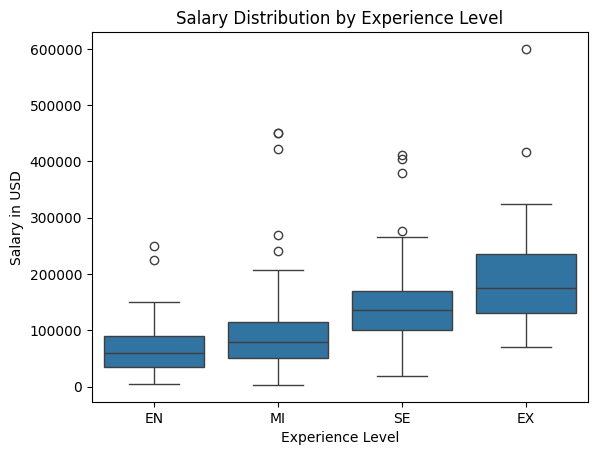

In [ ]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Experience Level')
plt.show()

**Observations**

There is a clear correlation between the experience level and the salary of data scientists. While there are outliers in every experience level category, the median shows a robust rise in salary in data scientists with more experience.

# Question 3 - Impact of Company Size on Data Scientist Salary:

<Figure size 800x600 with 0 Axes>

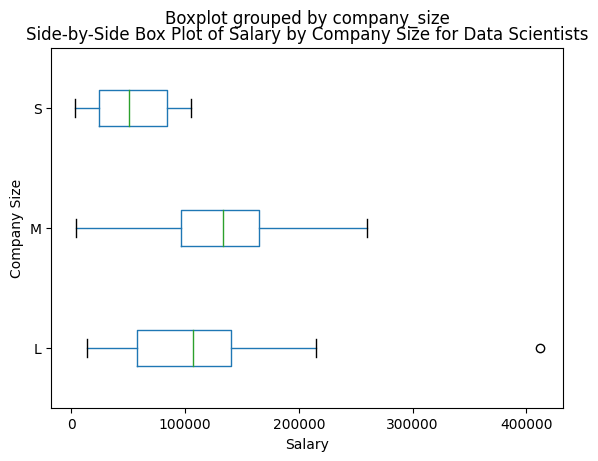

In [ ]:
dfds = df[df['job_title'] == 'Data Scientist']

plt.figure(figsize=(8, 6))
dfds.boxplot(column='salary_in_usd', by='company_size', vert=False, grid = False)
plt.title('Side-by-Side Box Plot of Salary by Company Size for Data Scientists')
plt.xlabel('Salary')
plt.ylabel('Company Size')
plt.show()

**Observations**

1. Small companies have the lowest median salary,, followed by medium companies, and the highest median salary is large companies.
2. The interquartile range of salaries in medium and large companies is wider compared to small companies - greater variability in salaries.
3. Large companies show an outlier which is significantly higher salary.

# Question 4 - Job Title Analysis

**engineer vs analyst vs scientist**

In [ ]:
scientist_df = df[df['job_title'].str.contains('Scientist', case=False)]
scientist_df['job_type'] = 'Scientist'

engineer_df = df[df['job_title'].str.contains('Engineer', case=False)]
engineer_df['job_type'] = 'Engineer'

analyst_df = df[df['job_title'].str.contains('Analyst', case=False)]
analyst_df['job_type'] = 'Analyst'
jobtypes = pd.concat([scientist_df, engineer_df, analyst_df])
jobtypes.head()

<ipython-input-54-494fd07ec767>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientist_df['job_type'] = 'Scientist'
<ipython-input-54-494fd07ec767>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineer_df['job_type'] = 'Engineer'
<ipython-input-54-494fd07ec767>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Scientist
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Scientist
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,Scientist
9,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,Scientist
10,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M,Scientist


<Axes: xlabel='job_type', ylabel='salary_in_usd'>

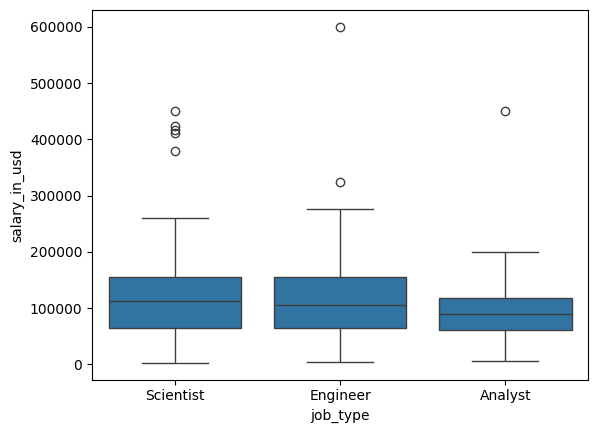

In [ ]:
sns.boxplot(x='job_type', y='salary_in_usd', data =jobtypes)

# Question 5 - Interactions Between Relationships

In [ ]:
pd.crosstab(index=jobtypes['job_type'], columns=jobtypes['company_size'], values= jobtypes['salary_in_usd'], aggfunc='mean')

company_size,L,M,S
job_type,,,
Analyst,101669.800000,100423.367089,45112.000000
Engineer,117626.787879,117419.000000,90733.161290
Scientist,126576.044118,128552.873563,79434.678571


**Observations**

1. Analyst job type is paid less compared to Engineers and Scientists across all company size.
2. Engineers and Scientists earn higher salaries in large and medium-sized companies compared to small companies.
3. Scientists at medium-sized companies have a slightly higher salary compared to large companies which means that some medium-sized companies pay competitively.

In [ ]:
size_vs_exp = pd.crosstab(index=jobtypes['experience_level'], columns=jobtypes['company_size'], values=jobtypes['salary_in_usd'], aggfunc='mean')
experience_order = ['EN', 'MI', 'SE', 'EX']
size_vs_exp = size_vs_exp.reindex(experience_order)
size_vs_exp

company_size,L,M,S
experience_level,,,
EN,78938.041667,55210.346154,61533.291667
MI,101350.186667,90917.355556,49277.875000
SE,150643.403509,135707.656627,113551.809524
EX,276611.000000,191500.000000,267093.500000


**Observations**

1. Across all experience_levels, salaries are likely to be higher for larger companies.
2. Samll companies have hard time to offer competitive salaries at entry and mid-level, but they offer really high salaries for expert-level employees.

In [ ]:
exp_vs_type = pd.crosstab(index=jobtypes['experience_level'], columns=jobtypes['job_type'], values=jobtypes['salary_in_usd'], aggfunc='mean')
exp_vs_type = exp_vs_type.reindex(experience_order)
exp_vs_type

job_type,Analyst,Engineer,Scientist
experience_level,,,
EN,57111.882353,68351.964286,66276.689655
MI,82138.447368,83052.493506,100678.270270
SE,112661.586207,137730.233645,154775.012658
EX,130000.000000,232224.444444,416000.000000


**Observations**

1. Scientists consistently earn the highest salaries across all experience levels.
2. Scientists have large increase at expert level.
3. Analyst earn the lowest across all experience levels.
4. As the experience_level goes up, all job types' salaries increase.

# Question 6 - Conclusions

1. Experience has a strong influence on salary. As experience increases, the salary increases as well. Significant increase is seen at the EX level.
2. Company size also has a strong relationship with salary. Larger companies offered higher salaries compared to medium and small companies. This relationship is true across all experience levels. Interesting fact about the company size is that small companies can offer competitive salaries for expert-level employees.
3. Job titles - Scientists and Engineers tend to earn higher salaries than Analysts across all experience levels and company sizes. The gap between these roles widen at senior and expert levels.
4. Analysis demonstrated a strong relationship between experience level, company size, and job title. Larger companies and roles requiring specialized skills like Scientists or Engineers tend to offer the highest salaries as experience increases.